<div style="text-align: center; font-size: 30px;">
Prácticas de Estadística<br/>
</div>
<div style="text-align: center; font-size: 30px;">
Distribuciones de probabilidad comunes
</div>
<div style="text-align: center; font-size: 16px; font-style: italic">
Material elaborado por M. Dolores Frías, Jesús Fernández y Carmen M. Sordo profesores del Departamento de Matemática Aplicada y Ciencias de la Computación de la Universidad de Cantabria.
</div>

# Objetivos

El concepto de variable aleatoria nos permite trabajar matemáticamente con los resultados de un
experimento aleatorio y caracterizar por completo la probabilidad de ocurrencia de cualquier suceso
asociado al experimento. En la práctica, muchas situaciones se caracterizan por las mismas variables
aleatorias (salvo algún parámetro a definir para ajustar la función de distribución a la situación
concreta). Estas variables aleatorias comunes nos permiten abordar numerosas situaciones prácticas
y resolver problemas realistas. 

El uso del ordenador, y de R en particular, nos va a permitir evaluar
probabilidades de sucesos asociados a experimentos aleatorios comunes, incluyendo aquellas situaciones
para las que no hemos visto una expresión analítica sencilla en la teoría. Además, nos permirirá simular
muestras aleatorias de estos experimentos comunes y representar las funciones de probabilidad, densidad de probabilidad o de distribución de estas distribuciones.

# Distribuciones de probabilidad en R

En teoría hemos visto fórmulas analíticas para las funciones de probabilidad
($p_X(x)$) o densidad de probabilidad ($f_X(x)$) de varios modelos de distribuciones comunes.
Hay distribuciones para las que la función de distribución ($F_X(x)$), a pesar
de ser fácilmente calculable mediante un sumatorio o una integral, resulta
demasiado laboriosa como para realizarla a mano o con una calculadora de
bolsillo. 

El paquete básico de R proporciona funciones de probabilidad, densidad de probabilidad y distribución para todas las variables aleatorias comunes vistas en clase y alguna más.

La siguiente tabla muestra en negrita las distribuciones vistas en clase, junto con su nombre en R y los parámetros que se pueden pasar a las funciones. Como veis en la tabla hay más distribuciones comunes de las estudiadas en clase.

<div><img alt="Resumen distribuciones comunes" src="./figuras/tabla_distcomunes.png" width="400"/></div>

## Función de probabilidad y densidad de probabilidad

Para cada una de estas variables aleatorias, R proporciona una función de
probabilidad si la variable es discreta o de densidad de probabilidad si la variable es continua, añadiendo el prefijo `d` en ambos casos al nombre que R asigna a esa distribución común. En cada caso habrá que proporcionar,
como mínimo, el valor de la variable para el que se quiere calcular la
probabilidad o densidad de probabilidad además de los
parámetros de la distribución común, de una forma muy parecida a la notación que
usamos en clase. 

Como se observa en la tabla anterior, los parámetros de entrada son distintos para
cada distribución por lo que se recomienda consultar la ayuda en cada caso.
Por ejemplo la orden `?dbinom` nos indica el uso de esta función:

In [ ]:
?dbinom

donde `x` representa el valor de la variable aleatoria para el que se quiere evaluar la función de probabilidad ($p_X(x)=P(X=x)$), `size` es el tamaño de la muestra (n) y `prob` es la probabilidad de éxito (p) del
suceso de Bernoulli.

Por ejemplo, para calcular la función de probabilidad binomial evaluada en 7, en el que tenemos 20 sucesos de Bernoulli independientes entre si y todos con la misma probabilidad de éxito 0.5, es decir 

$p_{B(20;0;5)}(7)\equiv p_{B(7; 20 ; 0 ; 5)}$ 

ejecutamos la siguiente orden:

In [2]:
# P(X=7) con X ~ B(20, 0.5)
n <- 20
p <- 0.5
dbinom(7, n, p)

[1] 0.07392883

Como sabemos, esta probabilidad se correspondería, por ejemplo, con la de obtener 7 caras en 20 lanzamientos de una moneda ya que en este experimento aleatorio la probabilidad de éxito es 0.5.

Cuando la variables a estudio es una variable aleatoria continua, el prefijo d proporciona el valor de la función densidad de probabilidad evaluada en un valor concreto de esa variable aleatoria. Por ejemplo:


In [4]:
dnorm(170, 150, 0.8)

[1] 9.567412e-137

proporciona el valor de la función de densidad de una variable aleatoria normal ($F_{N(150,0.8)}(170)$) con media 150 y desviación estándar 0.8, evaluada en 170. 
Notar que el resultado es un valor mayor que 1, ya que no se trata de una probabilidad, sino de la densidad de probabilidad. 

## Función de distribución

De la misma forma, mediante el prefijo `p`, obtenemos la función de distribución. 

Por ejemplo, la probabilidad de obtener 7 caras o menos en 20 lanzamientos de una moneda

$F_{B(20;0;5)}(7)\equiv F_{B(7;20;0;5)}$

se obtiene en R como:

In [5]:
# P(X<=7) con X ~ B(20, 0.5)
pbinom(7, 20, 0.5)

[1] 0.131588

Nótese que, de nuevo, el primer argumento de la función es el valor de la variable aleatoria para el que queremos evaluar la función de distribución y, a continuación, los parámetros necesarios en el orden en que aparecen en
la tabla anterior.

Para entender mejor como calcular las distintas opciones de R vamos a resolver un ejercicio tipo como los de los ejemplos resueltos en clase. De esta manera podemos usar R para comprobar los resultados que obtengamos aplicando
las fórmulas vistas en clase. 

*Un lote de procesadores de ordenador contiene un 40% de unidades defectuosas. Cuando se detecta el error ya han sido instalados todos los procesadores del lote en los ordenadores. Por esta razón el responsable del departamento de calidad decide realizar una revisión de algunos ordenadores que incorporan un
procesador de dicho lote. Considerará que un ordenador es defectuoso si lo es
el procesador.*

1. *Calcular la probabilidad de que menos de 4 equipos lleven instalado un procesador defectuoso de un total de 20 ordenadores revisados.*

La variable aleatoria X representa el número de ordenadores defectuosos de un total de 20 revisados. Esta variable sigue una distribución binomial, B(n=20, p=0.4), ya que el experimento consiste en repetir sucesos de Bernoulli (el experimento de analizar un ordenador tiene dos posibles resultados: éxito (tiene instalado un procesador defectuoso) o fracaso (el procesador está bien)), además estos sucesos son independientes y todos tienen la misma probabilidad de éxito p=0.4.

Luego la probabilidad que nos piden es $P(X\leq 3) = F_{B(20,0.4)}(3)$: 

In [6]:
# P(X<=3) con X ~ B(20, 0.4)
n <- 20
p <- 0.4
pbinom(3,n,p)

[1] 0.01596116

Es decir, la probabilidad de que menos de 4 ordenadores lleven instalado un procesador defectuoso de un total de 20 ordenadores revisados es de 0.01596116.

Nótese que, el primer argumento de la función es el valor de la variable aleatoria en el que queremos evaluar la función de distribución y, a continuación, los parámetros necesarios en el orden en que aparecen en la tabla anterior (`size, prob`).

2. *¿Y la probabilidad de que más de 3 sean defectuosos?*
   
Nuestra variable aleatoria X es la misma, número de ordenadores defectuosos de un total de 20 revisados, sigue comportándose como una distribución binomial, B(n=20, p=0.4). La probabilidad que debemos calcular en este caso será $P(X>3) = 1-F_{B(20,0.4)}(3)$ que vendrá dada por:

In [ ]:
# P(X>3) con X ~ B(20, 0.4)
1-pbinom(3,n,p)

Obtenemos que la probabilidad de que más de 3 ordenadores lleven instalado un procesador defectuoso de un total de 20 ordenadores revisados es de 0.9840388.

Si nos fijamos en la ayuda obtenida antes, esta función permite calcular P(X>3) directamente cambiando el argumento `lower.tail` a FALSE. 

In [7]:
pbinom(3,n,p, lower.tail=FALSE)

[1] 0.9840388

3. *¿Y la probabilidad de que 5 de esos 20 ordenadores revisados sean defectuosos?*
   
Nuestra variable aleatoria tampoco cambia en este caso X cuenta el número de ordenadores defectuosos de un total de 20 revisados que sigue una distribución binomial, B(n=20, p=0.4). Sin embargo en este caso debemos calcular $P(X=5) = p_{B(20,0.4)}(5)$ que vendrá dada por:

In [8]:
# P(X=5) con X ~ B(20, 0.4)
dbinom(5,n,p)

[1] 0.07464702

Por tanto, la probabilidad de que 5 ordenadores lleven instalado un procesador defectuoso de un total de 20 ordenadores revisados es de 0.07464702.

4. *Calcular la probabilidad de encontrar el primer ordenador defectuoso al examinar el séptimo equipo.*

En este caso la variable aleatoria si cambia ya que en este experimento estamos interesados en contar el número de ordenadores revisados hasta encontrar el primero defectuoso. Esta nueva variable que llamaremos Y, sigue una distribución geométrica, G(p=0.4) ya que cuenta el número de sucesos de Bernoulli realizados, independientes entre si y con la misma probabilidad de éxito, hasta que aparece el primer éxito (procesador defectuoso).

La probabilidad que debemos calcular será $P(Y = 7) = p_{G(0,4)}(7)$ que calculada con la formulación vista en clase resulta ser 0.0186624.

Como vereis en la ayuda de la distribución geométrica (`?dgeom`), R define la variable geométrica de forma distinta a como lo hemos hecho en clase ya que considera la variable aleatoria (K) como el número de fracasos antes de obtener el primer éxito en una serie de sucesos de Bernouilli independientes y con la misma probabilidad individual de éxito. 

En teorı́a hemos definido la variable geométrica, como aquella que cuenta el número de intentos hasta el primer éxito. Es decir, $Y = K + 1$ (K no cuenta el éxito) y la función de probabilidad vista en teorı́a se puede obtener de la que da R a partir de:

$p_Y(y) = P(Y = y) = P(K + 1 = y) = P(K = y − 1) = p_K(y − 1)$

De acuerdo con esta definición si K es la variable aleatoria número de fracasos hasta obtener el primer éxito, en R la probabilidad que nos piden calcular ($P(K = 6)$) vendrá dada por:

In [1]:
# P(Y=7) con Y ~ G(0.4)
dgeom(6,0.4)

[1] 0.0186624

Como vemos, se trata de una versión desplazada de la que usamos en teorı́a. Podrı́amos definir unas funciones de R nuevas que nos permitan hacer los cálculos según la definición de variable aleatoria geométrica que manejamos en teoría de la forma:

In [3]:
# Funcion de probabilidad de G(p)
dG <- function(x,p) {dgeom(x-1,p)}
# Funcion de distribucion de G(p)
pG <- function(x,p) {pgeom(x-1,p)}

y de esta manera el valor de la probabilidad que nos piden $P(Y = 7)$ se calcuları́a como:

In [4]:
# P(Y=7) con Y ~ G(0.4)
dG(7,0.4)

[1] 0.0186624

resultando que la probabilidad de encontrar el primer ordenador defectuoso al examinar el séptimo equipo es de 0.0186624.

5. *Calcular la probabilidad de que el décimo ordenador revisado sea el cuarto no defectuoso.*
   
En este caso definimos una nueva variable aleatoria W, que será el número de ordenadores revisados hasta encontrar el cuarto ordenador defectuoso. Esta variable sigue una distribución binomial negativa, BN(r=4,p=0.6) ya que contamos el número de sucesos de Bernoulli realizados, independientes entre si y con la misma probabilidad de éxito, hasta que aparece el cuarto éxito (procesador defectuoso).

La probabilidad que debemos calcular será $P(W = 10) = p_{BN(4,0,6)}(10)$ que calculada con la formulación vista en teorı́a resulta ser 0.04459069.

Si consultais la ayuda de la distribución Binomial Negativa que ofrece R (`?dnbinom`), observareis que esta distribución considera como variable aleatoria K el número de fracasos antes de obtener un número r de éxitos en vez de la definición que hemos utilizado en clase para la variable binomial negativa que cuenta el número de intentos hasta conseguir el éxito r. Es decir, $W = K + r$. 

La variable K sigue también una distribución binomial negativa cuya función de probabilidad es de la forma

$ p_K(k)=\left(\begin{array}{c}
k+r-1\\r-1
\end{array}\right) p^r (1-p)^k,\;\; k\geq 0
$

De acuerdo con esta definición, en R la probabilidad que nos piden calcular vendrá dada por:

In [5]:
# P(W=10) con W ~ BN(4,0.4)
dnbinom(6,4,0.6)

[1] 0.04459069

resultando que la probabilidad de que el décimo ordenador revisado sea el cuarto no defectuoso es de 0.04459069.

La definición de R de la variable aleatoria hipergeométrica, tampoco es idéntica a la vista en clase. Al igual que hicimos para la variable geométrica, se pueden definir en R funciones para representar las definiciones de las variables binomial negativa e hipergeométrica vistas en teorı́a. Utilizar la ayuda de R para ver las definiciones de estas variables dos variables (`?dhyper` y `?dnbinom`).

## Función cuantil

Para cada una de las variables aleatorias indicadas, se puede obtener la función cuantil ($F_X^{-1}(p)$) mediante el prefijo `q`. 

Tomando como ejemplo el primer apartado del ejercicio de los procesadores, en el que obteníamos que $P(X\leq 3) = F_{B(20,0.4)}(3)=0.01596116$, podemos obtener el menor valor de $X$ ($c$) tal que $P(X\le c)> 0.01596116$ dado que $X\sim B(20,0.4)$:

In [9]:
# P(X<=c) con X ~ B(20, 0.4)
qbinom(0.01596116,n,p)

[1] 3

que resulta ser 3 equipos. Nótese que, en este caso, el primer argumento es la probabilidad y a continuación se colocan los argumentos en el orden indicado en la tabla.

El primer cuartil de esa misma distribución vendrá dado por:

In [10]:
# Q1 con X ~ B(20, 0.4)
qbinom(0.25,n,p)

[1] 6

Se puede comprobar que realmente el valor de la variable x=6 es el primer cuartil: 

In [11]:
# P(X<=5) con X ~ B(20, 0.4)
pbinom(5,n,p)

[1] 0.125599

para x=5, el valor de función de distribución es menor de 0.25 luego calculamos que ocurre con x=6: 

In [12]:
# P(X<=6) con X ~ B(20, 0.4)
pbinom(6,n,p)

[1] 0.2500107

aqui se supera el valor 0.25, luego Q1=6 ordenadores. 

Como ya comentamos antes, en R la definición de una variable geométrica, es una version desplazada de la que usamos en teorı́a, por lo que podrı́amos también definir una nueva función de R para calcular los cuantiles para esta distribución de acuerdo a la definición de clase:

In [11]:
# Funcion cuantil de G(p)
qG <- function(x,p) {1+qgeom(x,p)}

Que podríamos usar por ejemplo para determinar la mediana ($C_{0.5}$) de una distribución G(0.4).

In [10]:
# P(Y<=y)>=0.5 con Y ~ G(0.4)
qG(0.5,0.4)

[1] 2

<div class="alert alert-block alert-info">
<strong>PRACTICA TÚ MISMO</strong>

- Definir unas nuevas funciones (BN y HG, con prefijos d, p y q) que correspondan con las definiciones vistas en clase para la binomial negativa e hipergeométrica.
    
- Dada una variable aleatoria X que sigue una B(200,0.4). Se pide:
  1. $P(X<71)$
  2. $P(X\geq 90)$
  3. $F_X(100)$
  4. $P(X\leq x)\geq0.4$
  5. $P(X\geq x)\geq0.8$
  6. $P(X=60)$
     
</n>

- Una variable aleatoria X se distribuye uniformemente en el intervalo (2, 4). Se pide:
  1. $P(X<2.5)$
  2. $P(X\geq 3.2)$
  3. $P(2.2 < X < 3.5)$
  4. $P(X\leq x)=0.4$
  5. $P(X\geq x)=0.8$
  6. $F_X(2.7)$

</n>

- La centralita telefónica de un hotel recibe un número de llamadas por minuto que sigue una ley de Poisson con
parámetro $\lambda=0.5$. Determinar la probabilidad de que en un minuto al azar:
  1. se reciba una única llamada.
  2. se reciban un máximo de dos llamadas.
  3. la centralita quede bloqueada, sabiendo que no puede realizar más de 3 conexiones por minuto.

</div>

## Muestras aleatorias

Por último, el prefijo `r` (abreviatura de *random*) nos permite obtener valores aleatorios (random) de una determinada variable aleatoria. Es decir, nos permite obtener valores concretos $x$ de una variable aleatoria $X$. O, dicho de otra forma, simular un experimento que siga una cierta distribución. 

Con las funciones de distribución comunes podemos simular experimentos con variables contínuas y discretas con un campo de existencia infinito numerable. 

Por ejemplo podemos obtener una muestra aleatoria tomada de una distribución binomial $B(20,0.5)$:

In [13]:
# Valores aleatorios de X ~ B(20,0.5)
n <- 20
p <- 0.5
rbinom(10,n,p)

[1] 10  9  9  9  9  6  9  8 11 13

Estos serían 10 posibles resultados de un experimento binomial en el que se realizan 20 experimentos de Bernoulli con probabilidad de éxito 0.5. Es decir el primer valor indica cuantos éxitos se han obtenido al realizar 20 experimentos de Bernoulli. Cada vez que se repite el comando anterior, los valores obtenidos cambian ya que se trata de un experimento aleatorio.  

De la misma forma se pueden obtener muestras aleatorias de cualquier otra distribución:

In [14]:
rnorm(15)          # Muestra de tamaño 15 de N(0,1)
rnorm(10, 165, 5)  # Muestra de tamaño 10 de N(165,sd=5)
rpois(10, 5)       # Muestra de tamaño 10 de Po(5)

[1] -0.96836002 -0.03447784 -0.99136099  1.85501272  1.32106071 -1.02629576
 [7]  0.40611467  0.81427584  1.63409948 -0.21553521 -0.66298819 -2.17593699
[13] -0.84839847  0.87944798  0.84074062

[1] 166.1883 163.4291 163.0412 168.2919 161.1940 163.9632 168.0150 158.2323
 [9] 164.0383 159.4275

[1]  7  5  8  6 11  4  1  4 11  3

Como veis las funciones de R correspondientes a la distribución normal toman como parámetros la media y la desviación estándar, no la varianza. Además en el caso en el que estemos trabajando con la distribución normal estándar (N(0,1)) no es necesario indicar estos dos parámetros ya que son los que toma por defecto.

# Representando distribuciones de probabilidad

En R es posible dibujar las funciones de distribución (o cualquier otra función)
mediante la función `curve`. Por ejemplo, para dibujar la función
de densidad normal tipificada entre -4 y 4, utilizaremos:

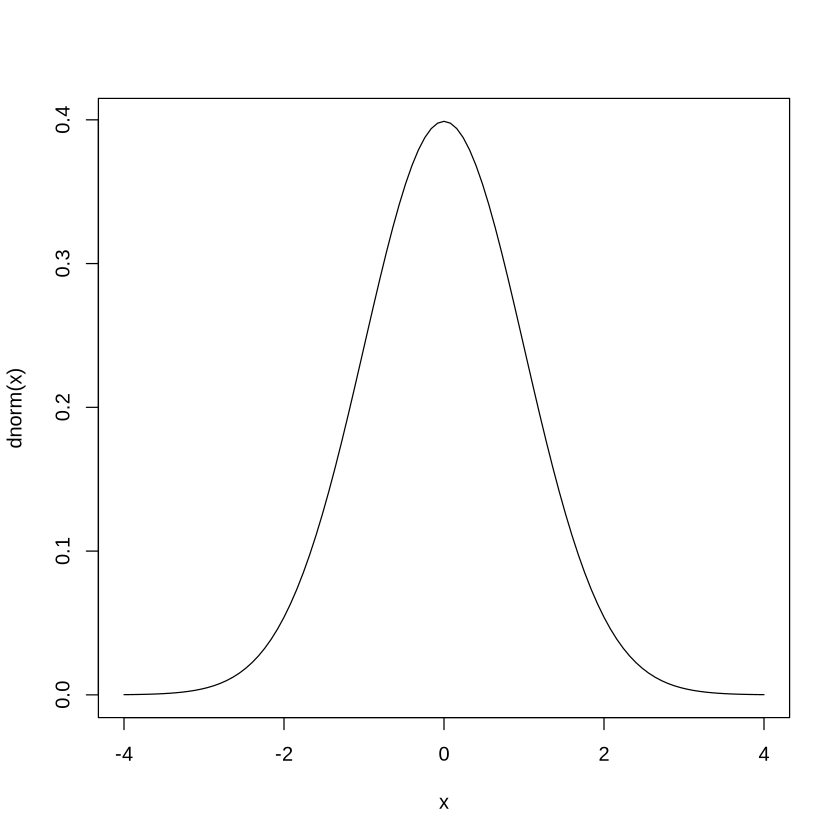

In [15]:
# N(0,1)
curve(dnorm(x), -4, 4)

El nombre `x` que colocamos como primer argumento lo utiliza la función `curve` y lo interpreta como la variable independiente a representar.

Podemos mejorar un poco el aspecto del gráfico utilizando los argumentos habituales en funciones de representación. Por ejemplo, etiquetar los ejes (con `xlab` e `ylab`), cambiar el color (`col`) o la anchura (`lwd`) de la línea o ponerle un título (`main`) al gráfico:

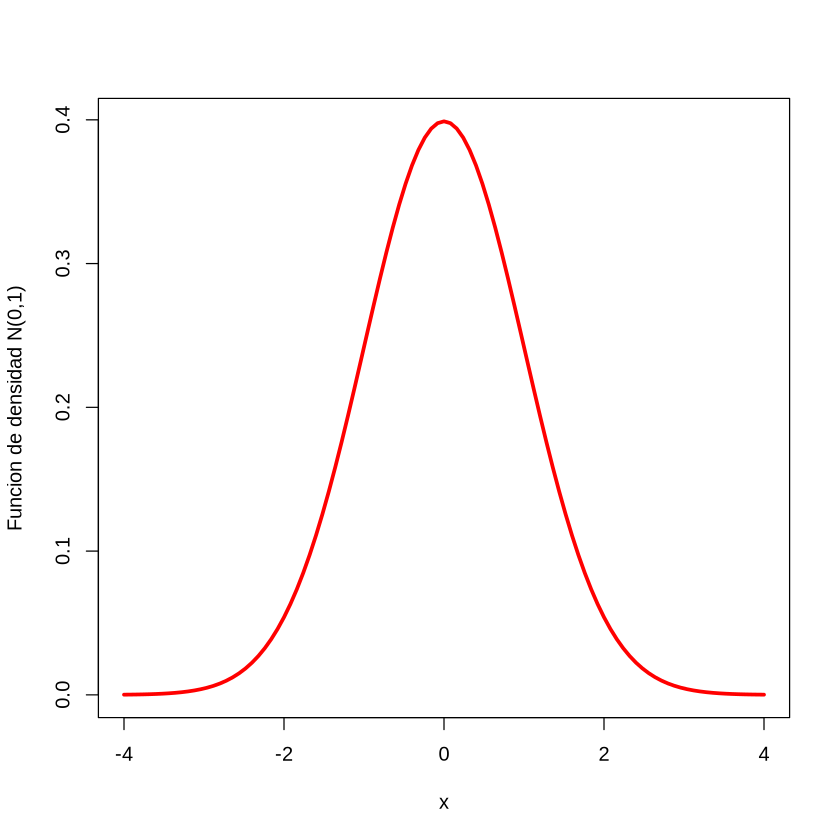

In [19]:
curve(dnorm(x), from=-4, to=4, col="red", lwd=3, ylab="Funcion de densidad N(0,1)")

Podemos añadir otra curva al mismo gráfico con el argumento `add=TRUE` :

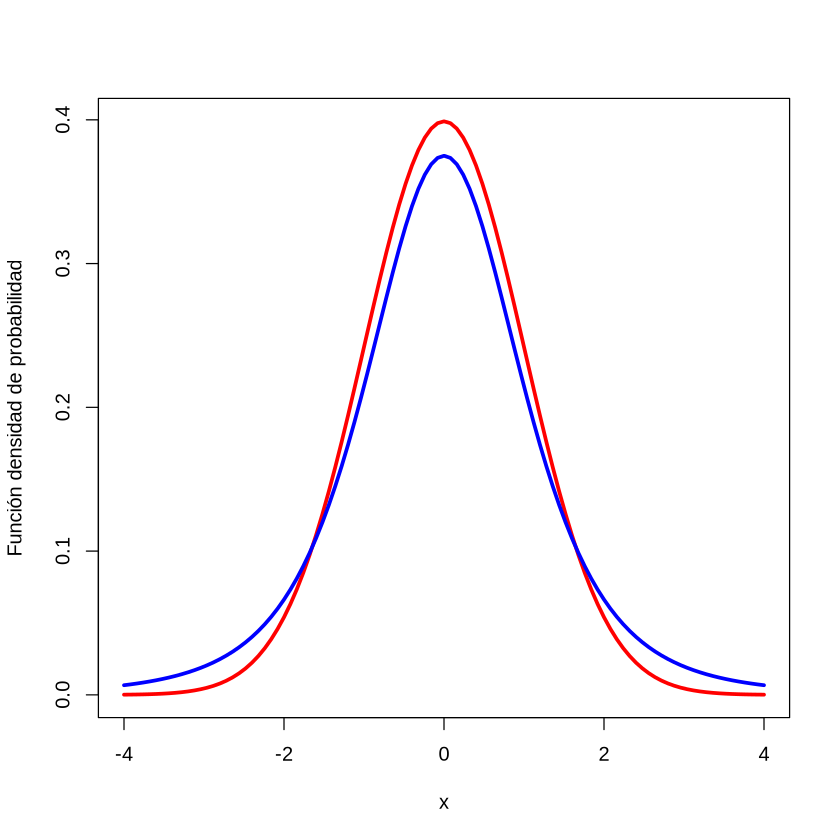

In [20]:
# N(0,1)
curve(dnorm(x), from=-4, to=4, col="red", lwd=3, ylab="Función densidad de probabilidad")
# t(4)
curve(dt(x, 4), col="blue", lwd=3, add=TRUE)

En este caso hemos añadido la función de densidad de la variable t de Student con 4 grados de libertad. Esta es otra ditribución común también con forma de campana. 

Ya que aparecen dos líneas en el mismo gráfico, debemos distinguirlas mediante una leyenda:

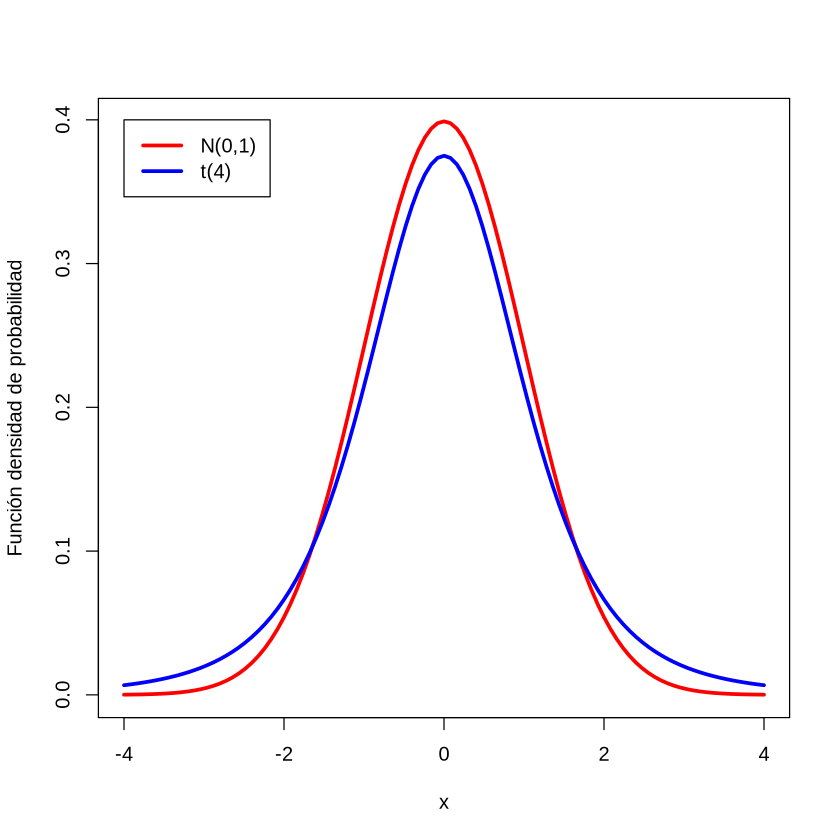

In [22]:
# N(0,1)
curve(dnorm(x), from=-4, to=4, col="red", lwd=3, ylab="Función densidad de probabilidad")
# t(4)
curve(dt(x, 4), col="blue", lwd=3, add=TRUE)
legend(-4, 0.4, legend=c("N(0,1)", "t(4)"), col=c("red","blue"), lwd=3)

Los dos primeros argumentos de la función `legend` dan la posición de la esquina superior izquierda de la leyenda. La gráfica resultante muestra las dos funciones de densidad: la distribución N(0,1) en rojo y t de Student con 4 grados de libertad en azul.

Cambiando el valor de los grados de libertad, se puede ver como la variable t de Student tiende a la normal tipificada a medida que aumentamos los grados de libertad.

Para dibujar una función de probabibilidad discreta podemos utilizar la función `plot`. Por ejemplo, para representar la función de probabilidad binomial B(n=30, p=0.5), (que podría representar la función de probabilidad de la variable aleatoria que cuenta el número de caras al lanzar una moneda 30 veces), podemos ejecutar los siguientes comandos:

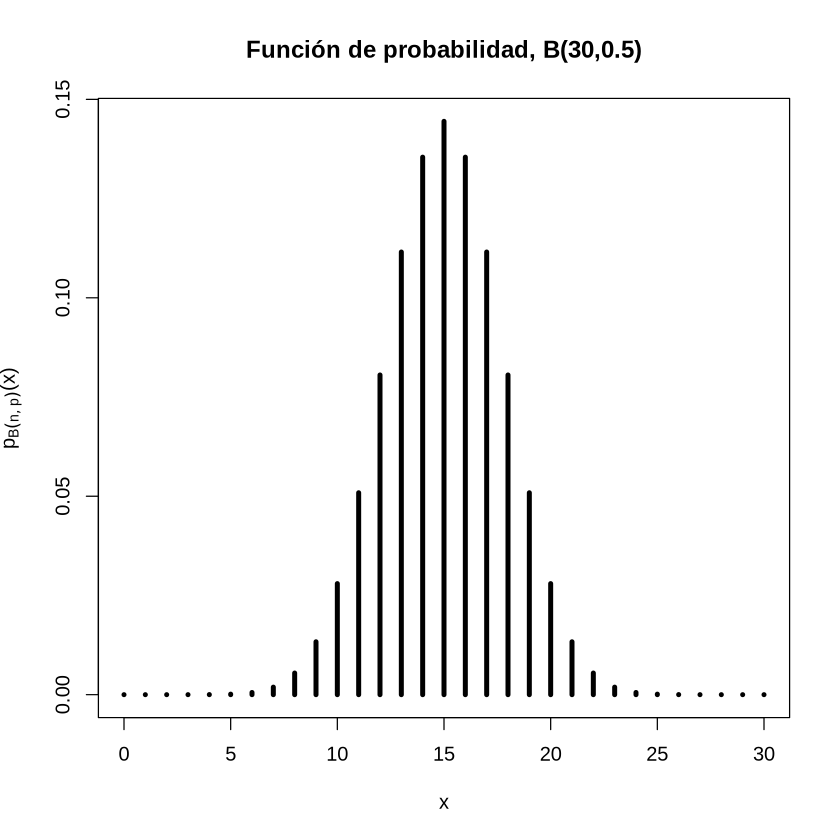

In [23]:
# Funcion de probabilidad B(30,0.5)
n <- 30
p <- 0.5
x.i <- 0:n
plot(x.i, dbinom(x.i,n,p), type="h", lwd=4, xlab="x", 
     ylab=expression('p'[B(n,p)]*'(x)'), main="Función de probabilidad, B(30,0.5)")

En la Figura anterior, como cabía esperar, se observa que hay una mayor probabilidad de obtener el mismo número de caras que de cruces, mientras que es muy poco probable obtener todas o casi todas caras así como ninguna o
casi ninguna cara. Probar a cambiar el valor de p en el código anterior para valores próximos a 0 o próximos a 1. Observar los cambios en el gráfico. 

Cabe destacar como en el código anterior se ha utilizado el argumento
`type="h"` para que la función `plot` dibuje impulsos en cada valor
en lugar de unir los puntos con líneas. 

Las funciones de distribución de variables discretas se pueden dibujar con sus saltos definiendo la siguiente función:

In [24]:
dibuja.FX.discreta <- function(pdist, rng, ...){
x.i <- seq(floor(rng[1]),ceiling(rng[2]))
x.i <- x.i[pdist(x.i, ...)-pdist(x.i-1, ...)!=0]
y.i <- pdist(x.i, ...)
ym1.i <- pdist(x.i-1, ...)
plot(2,xlim=rng, ylim=c(0,1),xlab="x",ylab="Funcion de distribucion")
segments(x.i, y.i, x.i+1, y.i, lwd=2)
segments(rng[1],0,x.i[1],0, lwd=2)
segments(x.i[length(x.i)], 1, rng[2],1, lwd=2)
segments(x.i, ym1.i, x.i, y.i, lty="dotted")
points(x.i, y.i, pch=20)
}

a la que llamaremos en el siguiente código que representa la función de distribución de una B(10,0.8): 

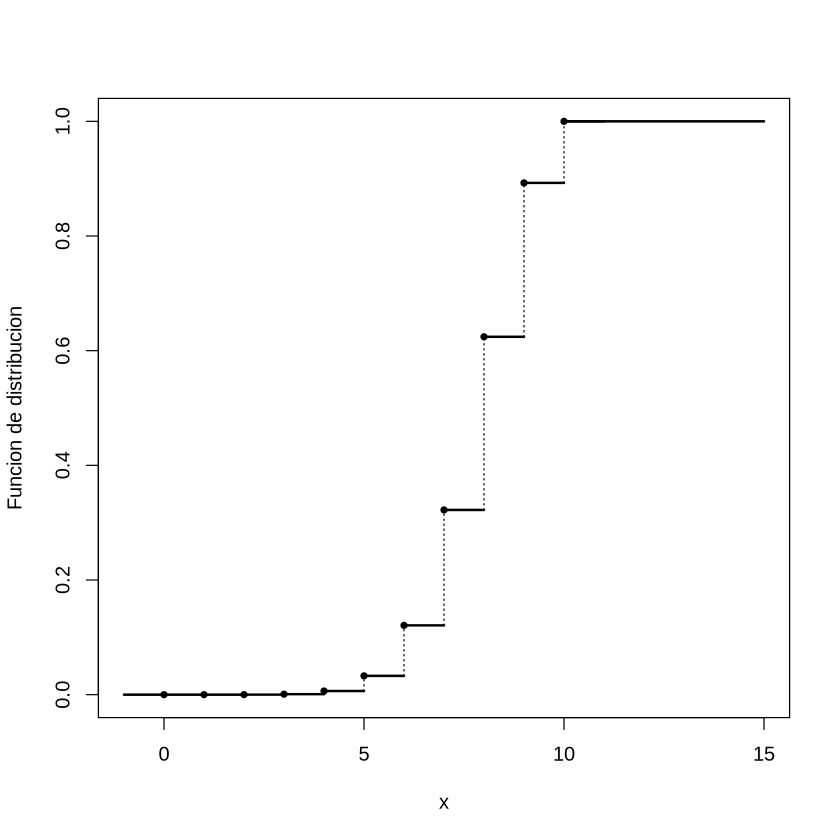

In [25]:
rango <- c(-1,15) # Rango a dibujar
# FX(x) con X~B(10,0.8)
dibuja.FX.discreta(pbinom, rango, 10,0.8)

Y en este caso para representar la función de distribución de una Po(5):

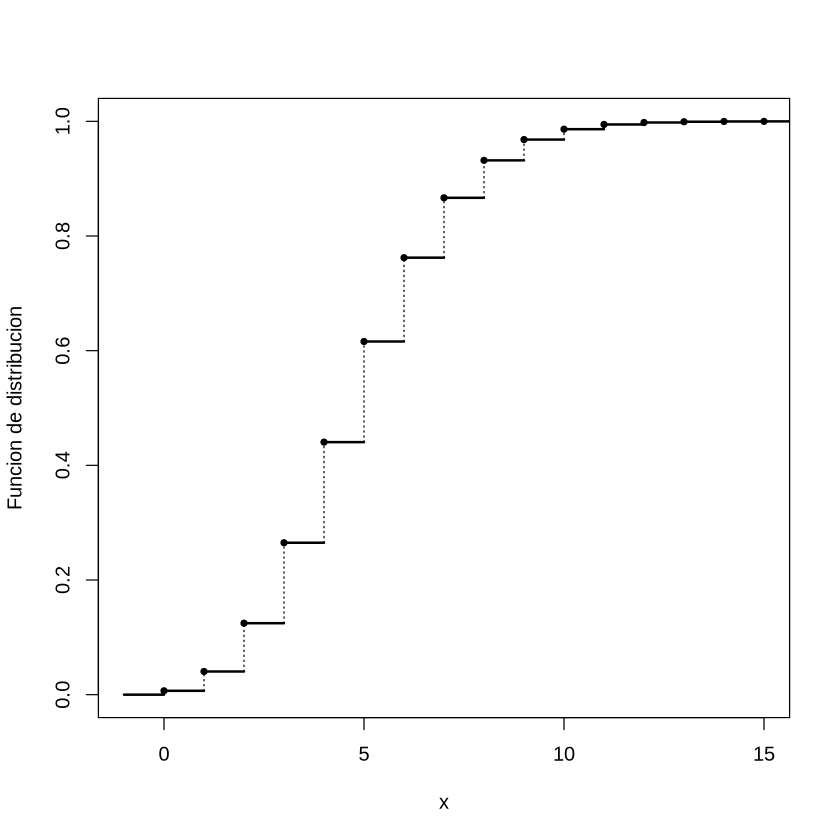

In [27]:
# FX(x) con X~Po(5)
dibuja.FX.discreta(ppois, rango, 5)

Podemos combinar la función anterior con la función `curve` para comprobar como la distribución binomial tiende a la normal cuando n es suficientemente
grande y la p no está proxima a 0 ni a 1:

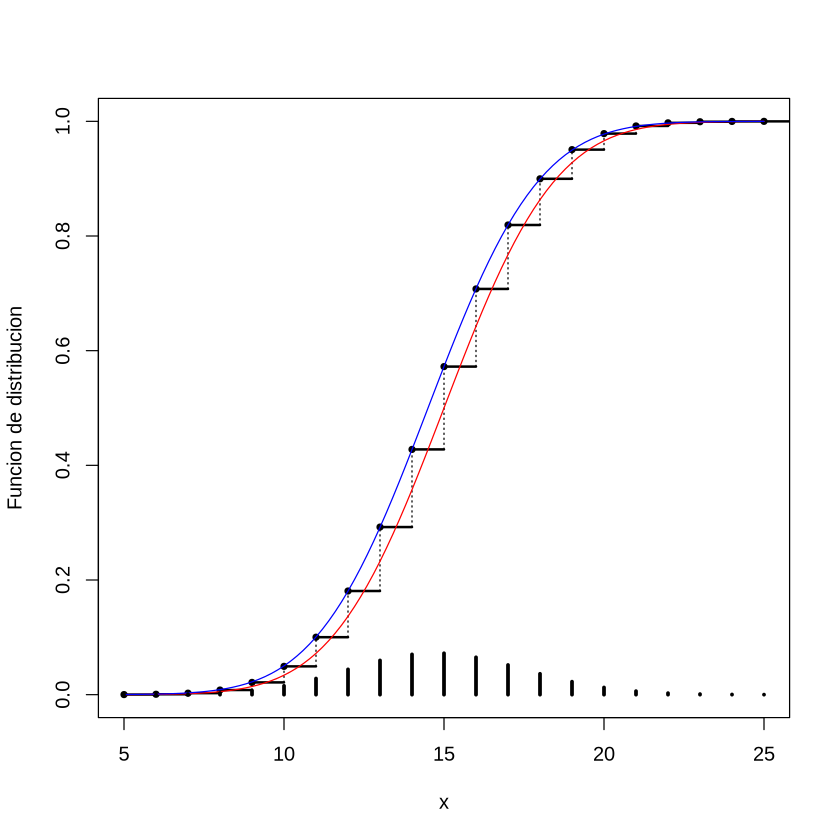

In [28]:
# B(30,0.5)
n <- 30
p <- 0.5
rango <- c(5,25)
media <- n*p
desv <- sqrt(n*p*(1-p))
# FX(x) con X~B(30,0.5)
dibuja.FX.discreta(pbinom, rango, n, p)
# Aproximacion Normal
curve(pnorm(x,media,desv), col="red", add=TRUE)
# Aproximacion Normal con correccion por continuidad
curve(pnorm(x+0.5,media,desv), col="blue", add=TRUE)
# Error aproximacion
lines(0:n, abs(pbinom(0:n,n,p)-pnorm(0:n,media,desv)), type="h",lwd=3)

En la gráfica resultante está representa la función de distribución de una variable B(30, 0.5) en negro y su aproximación con la distribución normal con y sin corrección por continuidad en azul y rojo respectivamente. 

Las barras verticales dibujadas en la parte inferior del gráfico indican el error que se comente al aproximar esa distribución binomial por una normal, el cual se calcula en la misma función `lines` del código anterior.

<div class="alert alert-block alert-info">
<strong>PRACTICA TÚ MISMO</strong>

- Si lanzamos un dado 288 veces, calcúlese la probabilidad de obtener 5 ó 6 puntos más de 90 veces y menos de 120.
Comprobar el valor obtenido mediante la representación de la función de distribución asociada a este experimento.
     
</n>

- Un ingeniero tiene una probabilidad 0.02 de cometer un error de consideración al realizar un proyecto. 
  1. Determinar la probabilidad de cometer 2 errores si realiza 20 proyectos.
  2. Calcular la probabilidad de cometer el primer error al realizar el sexto proyecto.
  3. Si cometer 10 errores supone su expulsión de la empresa, calcular la probabilidad de ser expulsado si realiza 40 proyectos.
  4. ¿y la de ser explusado tras realizar el proyecto número 15?

</n>

- La estatura de 1000 estudiantes de bachillerato está distribuida normalmente con una media de 168 cm y una desviación típica de 5 cm. Calcúlese:
    1. Representar la función de densidad de esta distribución.
    2. Entre qué valores en torno a la media se encontrará el 95% de los alumnos.
    3. Entre qué valores en torno a la media se encontrará el 50% de los alumnos.
    4. A partir de qué altura se encontrará el 15% de los alumnos más cualificados.
    5. A partir de qué altura se encontrá el 5% de los alumnos más cualificados. 

</div>